Perceptron
-> Universal approximation theroem
-> Add hidden layer to solve any problem in the world

# Perceptron

## Single Layer Perceptron

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

In [ ]:
iris = load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [ ]:
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [ ]:
data1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
x = iris.data[:,(2,3)]
print(x)

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

In [ ]:
y = (iris.target==0).astype(int)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [ ]:
x_train.shape
print(y_train.shape)

(112,)


In [ ]:
perceptron_model = Perceptron(random_state=42)

In [ ]:
perceptron_model.fit(x_train,y_train)

Perceptron(random_state=42)

In [ ]:
x_test.shape

(38, 2)

In [ ]:
y_pred = perceptron_model.predict(x_test)
print(y_pred)

[0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1
 0]


In [ ]:
print(perceptron_model.predict([[0.23,0.45]]))

[1]


In [ ]:
print(y_test)

[0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1
 0]


In [ ]:
for x in range(len(y_test)):
  if y_test[x] == y_pred[x]:
    print("yes")
  else:
    print("no")

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


In [ ]:
print("accuracy score:{}".format(accuracy_score(y_test,y_pred)))

accuracy score:1.0


## Multilayer perceptron

In [ ]:
pip install ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install visualkeras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt

In [ ]:
from ann_visualizer.visualize import ann_viz
import visualkeras

In [ ]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
x_train/=255
x_test/=255

In [ ]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


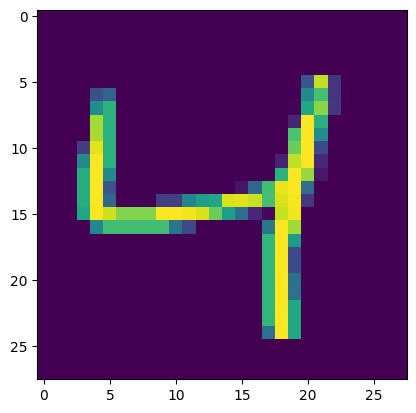

In [ ]:
plt.imshow(x_train[2])

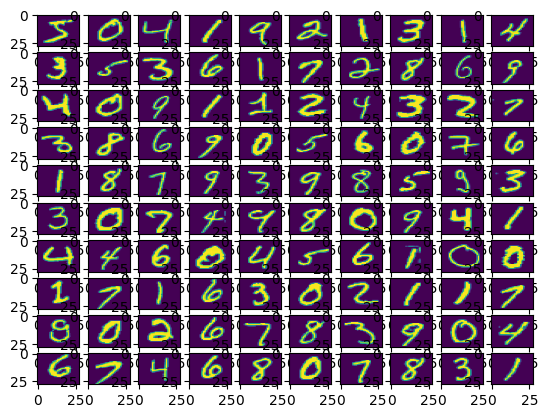

In [ ]:
fig,ax = plt.subplots(10,10)
k = 0
for i in range(10):
  for j in range(10):
    ax[i][j].imshow(x_train[k].reshape(28,28),
                    aspect='auto')
    k+=1
plt.show()

In [ ]:
model = Sequential(
    [
        Flatten(input_shape = (28,28)),
        Dense(256,activation="sigmoid"),
        Dense(128,activation="sigmoid"),
        Dense(10,activation="sigmoid")
    ]
)

In [ ]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
from tensorflow.keras.utils import plot_model

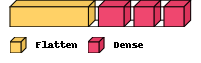

In [ ]:
visualkeras.layered_view(model,legend=True)

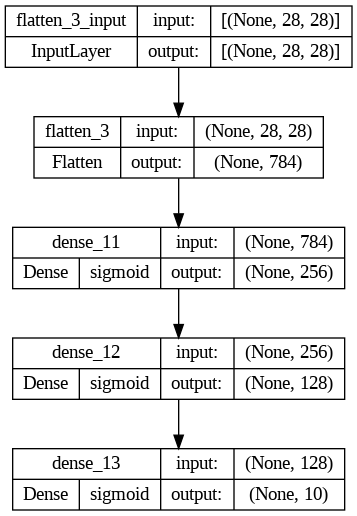

In [ ]:
plot_model(model,show_shapes=True,show_dtype=False,to_file="MLP.png",show_layer_names=True,dpi=96,layer_range=None,show_layer_activations=True)

In [ ]:
model.fit(x_train,y_train,epochs=100,batch_size=2000,validation_split=0.2)

Epoch 1/100
24/24 [==============================] - 3s 79ms/step - loss: 2.0791 - accuracy: 0.4164 - val_loss: 1.7195 - val_accuracy: 0.6844
Epoch 2/100
24/24 [==============================] - 2s 65ms/step - loss: 1.3700 - accuracy: 0.7283 - val_loss: 1.0117 - val_accuracy: 0.8098
Epoch 3/100
24/24 [==============================] - 2s 63ms/step - loss: 0.8427 - accuracy: 0.8160 - val_loss: 0.6552 - val_accuracy: 0.8591
Epoch 4/100
24/24 [==============================] - 1s 57ms/step - loss: 0.5931 - accuracy: 0.8635 - val_loss: 0.4877 - val_accuracy: 0.8880
Epoch 5/100
24/24 [==============================] - 2s 63ms/step - loss: 0.4670 - accuracy: 0.8858 - val_loss: 0.4005 - val_accuracy: 0.9006
Epoch 6/100
24/24 [==============================] - 2s 64ms/step - loss: 0.3963 - accuracy: 0.8985 - val_loss: 0.3498 - val_accuracy: 0.9093
Epoch 7/100
24/24 [==============================] - 2s 70ms/step - loss: 0.3521 - accuracy: 0.9074 - val_loss: 0.3165 - val_accuracy: 0.9153
Epoch 

In [ ]:
resullts = model.evaluate(x_test,y_test,verbose=0)
print(resullts)

[0.07138657569885254, 0.978600025177002]


TypeError: ignored

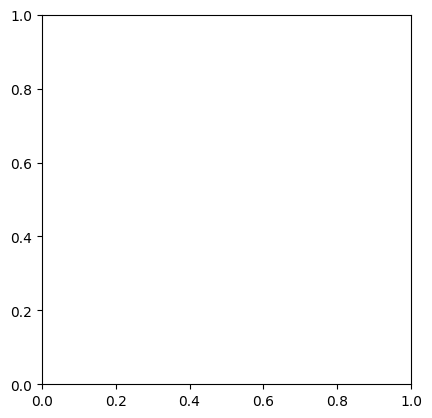

In [ ]:
import matplotlib.pyplot as plt

# Load the image
image = plt.imread("/content/5.png")

# Display the image


image = image.resize(28,28)
plt.imshow(image)

In [ ]:
prediction = model.predict(image)

ValueError: ignored

In [ ]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
x_test[19].shape

(28, 28)

In [ ]:
y_pred[19]

array([0.0173898 , 0.37296855, 0.07221038, 0.00238953, 0.99999684,
       0.10533975, 0.24667612, 0.67117524, 0.01155092, 0.3557902 ],
      dtype=float32)

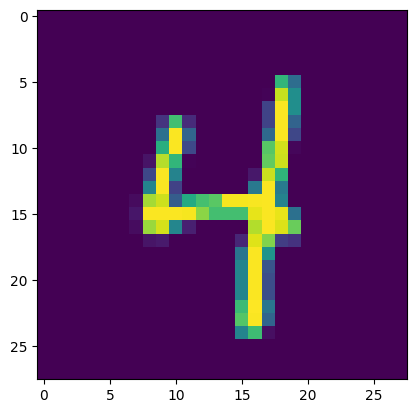

In [ ]:
plt.imshow(x_test[19])

In [ ]:
np.argmax(y_pred[19])

4